In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


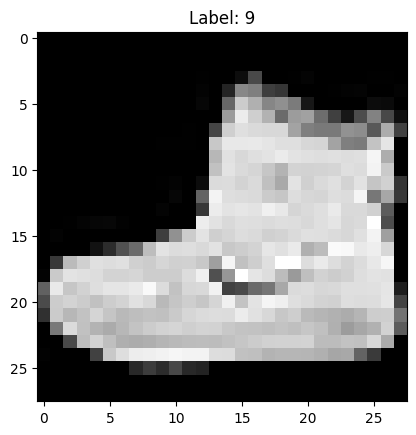

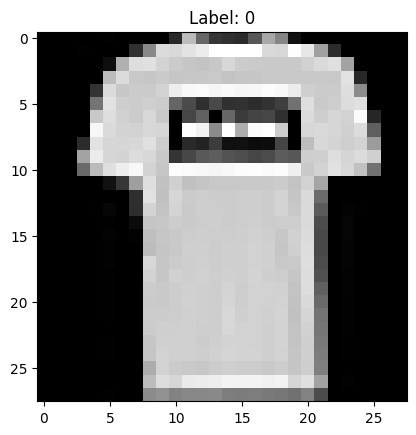

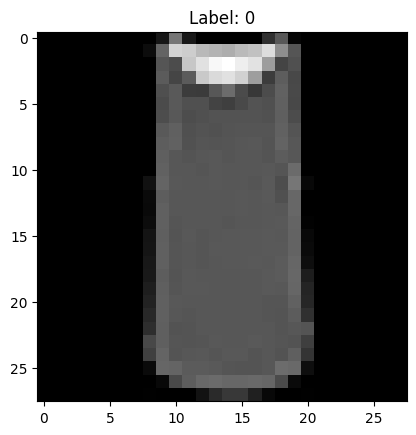

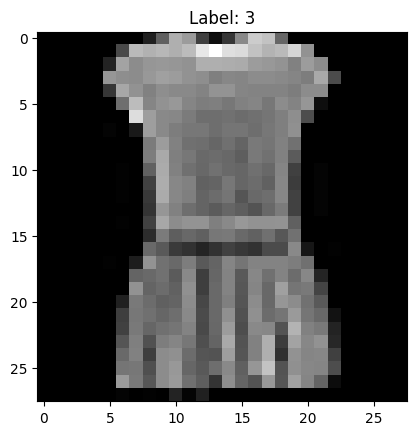

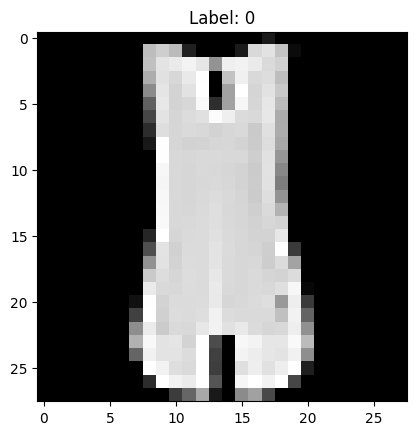

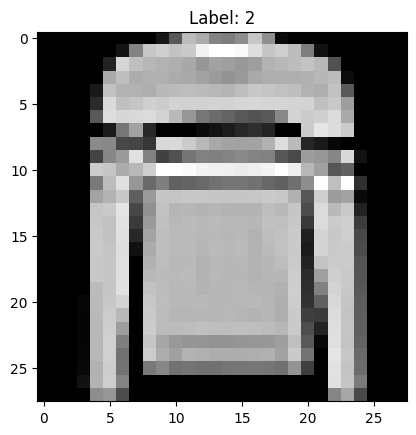

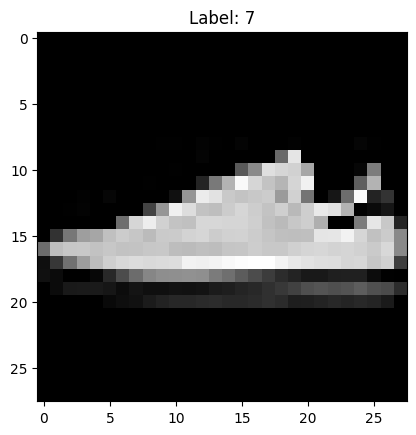

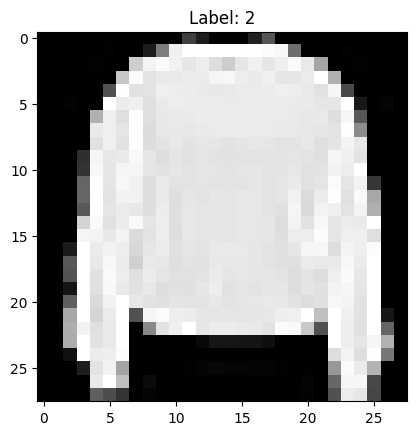

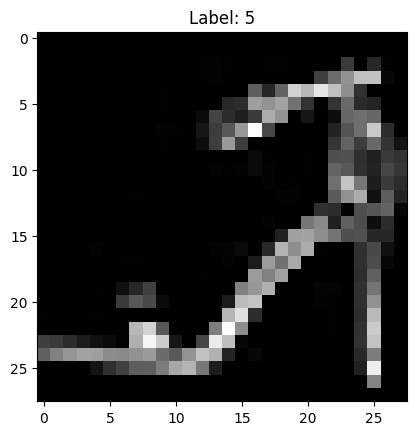

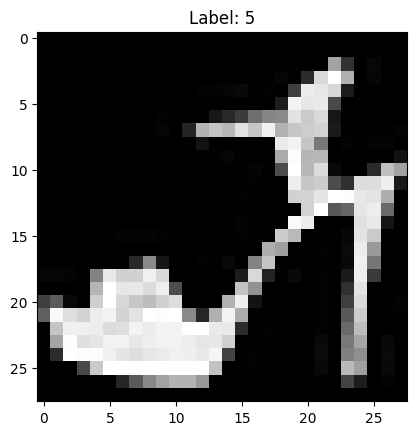

In [ ]:
import matplotlib.pyplot as plt

# Display the first 10 images and their labels
for i in range(10):
  plt.imshow(x_train[i], cmap='gray')
  plt.title('Label: {}'.format(y_train[i]))
  plt.show()


In [ ]:
import numpy as np

# Count the occurrences of each label in the training set
label_counts = np.bincount(y_train)

# Print the label counts
print("Label Counts:")
for i, count in enumerate(label_counts):
  print("Label {}: {}".format(i, count))

# Calculate the percentage of each label
label_percentages = label_counts / len(y_train) * 100

# Print the label percentages
print("\nLabel Percentages:")
for i, percentage in enumerate(label_percentages):
  print("Label {}: {:.2f}%".format(i, percentage))

# Check if the dataset is balanced (e.g., within 5% difference for each label)
is_balanced = np.all(np.abs(label_percentages - np.mean(label_percentages)) < 5)

if is_balanced:
  print("\nThe dataset is relatively balanced.")
else:
  print("\nThe dataset is not balanced.")


Label Counts:
Label 0: 6000
Label 1: 6000
Label 2: 6000
Label 3: 6000
Label 4: 6000
Label 5: 6000
Label 6: 6000
Label 7: 6000
Label 8: 6000
Label 9: 6000

Label Percentages:
Label 0: 10.00%
Label 1: 10.00%
Label 2: 10.00%
Label 3: 10.00%
Label 4: 10.00%
Label 5: 10.00%
Label 6: 10.00%
Label 7: 10.00%
Label 8: 10.00%
Label 9: 10.00%

The dataset is relatively balanced.


In [ ]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7805 - loss: 0.6326
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8605 - loss: 0.3879
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8735 - loss: 0.3427
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8849 - loss: 0.3102
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8905 - loss: 0.2965
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8963 - loss: 0.2810
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9001 - loss: 0.2695
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9051 - loss: 0.2575
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9058 - loss: 0.2537
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9122 - loss: 0.2366
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8790 - loss: 0.3479
Test accuracy: 0.8794999718666077


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


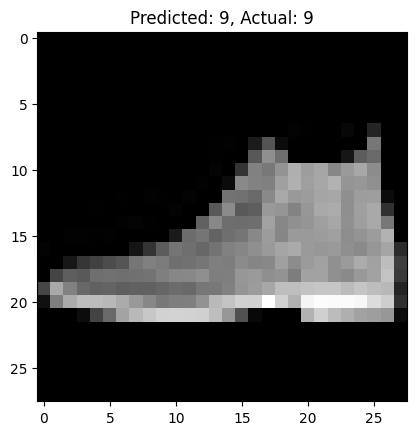

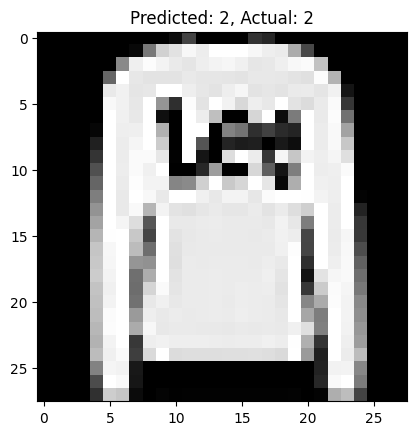

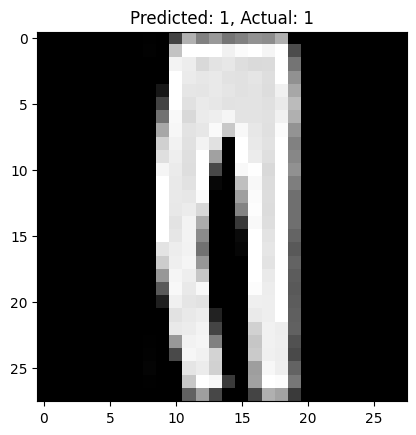

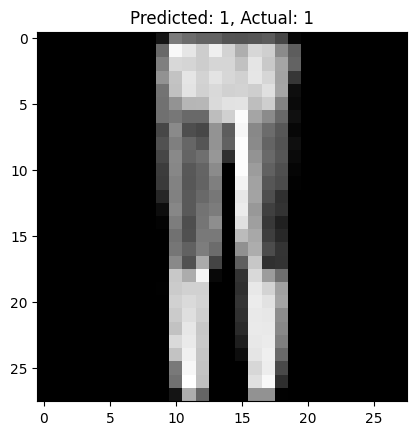

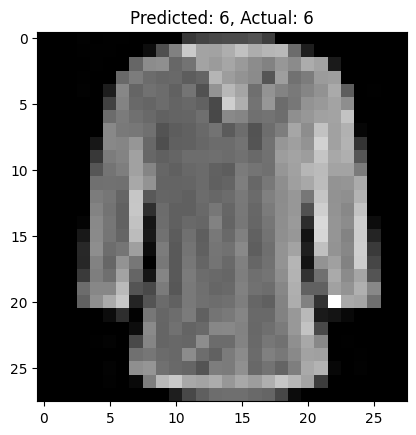

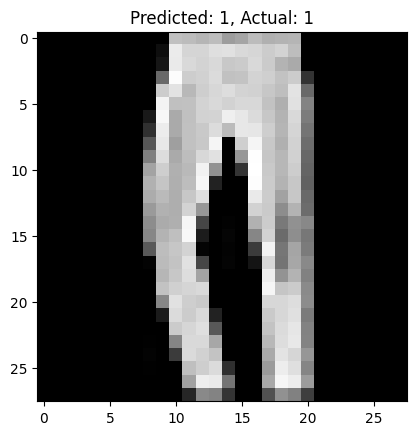

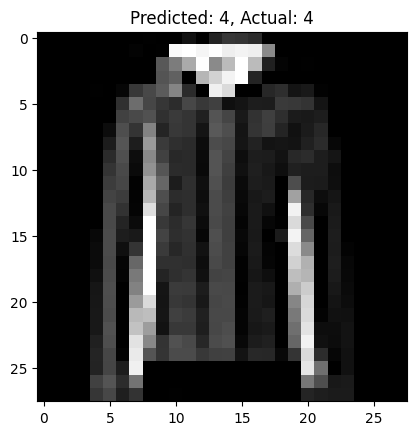

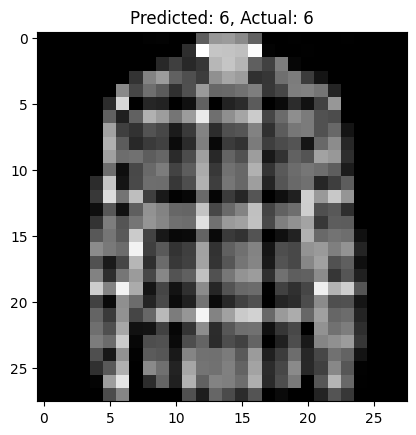

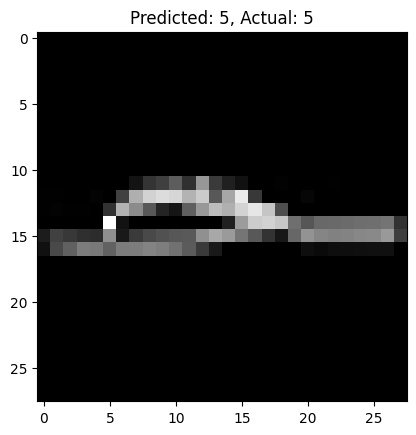

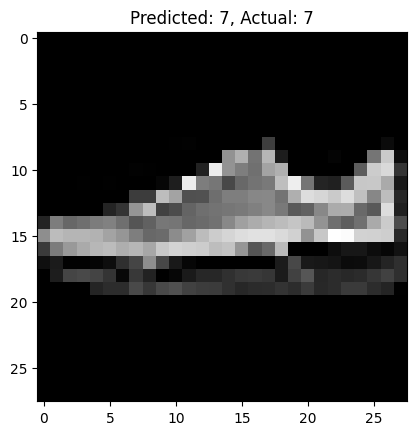

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Get predictions for the test set
y_pred = model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Display some examples of predicted vs actual labels
num_examples = 10
for i in range(num_examples):
  plt.imshow(x_test[i], cmap='gray')
  plt.title(f"Predicted: {y_pred_classes[i]}, Actual: {y_true_classes[i]}")
  plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.72      0.86      0.78      1000
           3       0.90      0.88      0.89      1000
           4       0.78      0.81      0.79      1000
           5       0.97      0.96      0.97      1000
           6       0.77      0.57      0.66      1000
           7       0.94      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7641 - loss: 0.6758
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8501 - loss: 0.4125
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8654 - loss: 0.3678
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8734 - loss: 0.3419
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8773 - loss: 0.3275
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8841 - loss: 0.3125
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8844 - loss: 0.3089
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8889 - loss: 0.2957
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8925 - loss: 0.2895
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8944 - loss: 0.2804
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8831 - loss: 0.3397
Test accuracy with dropout: 0.88319998979

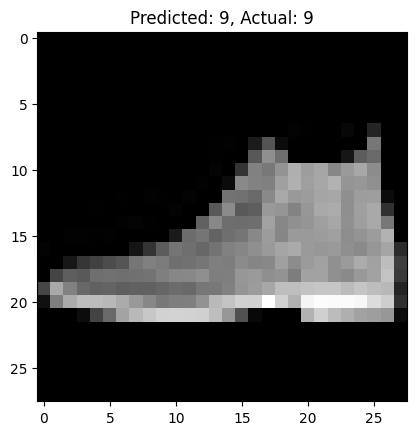

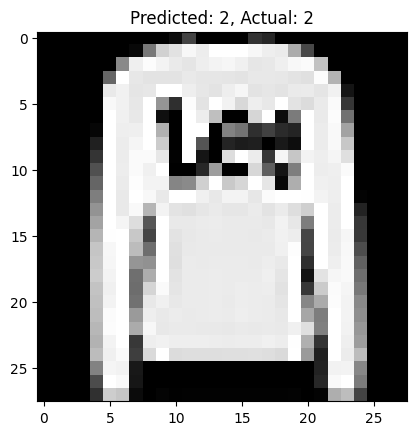

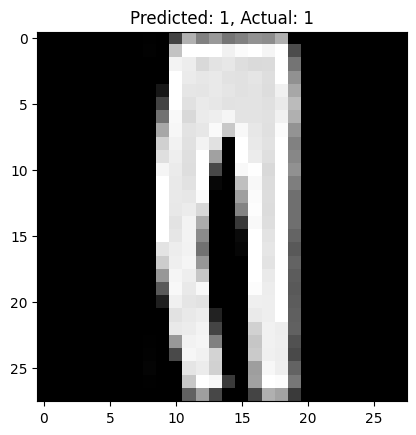

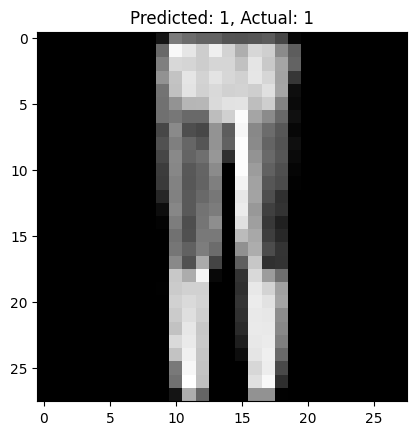

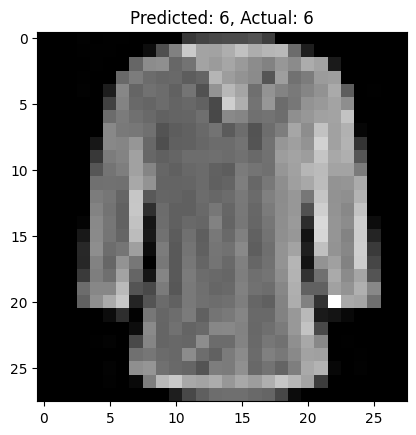

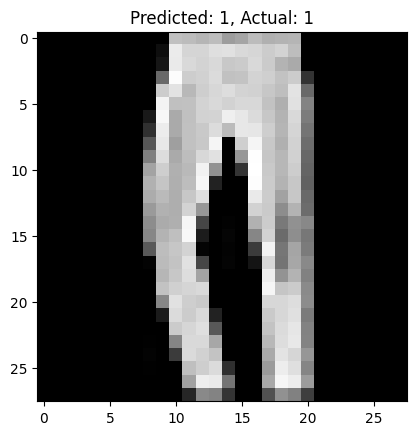

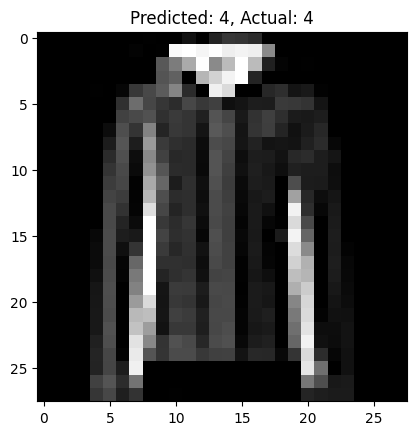

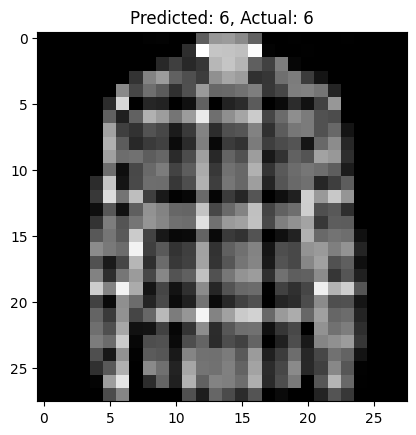

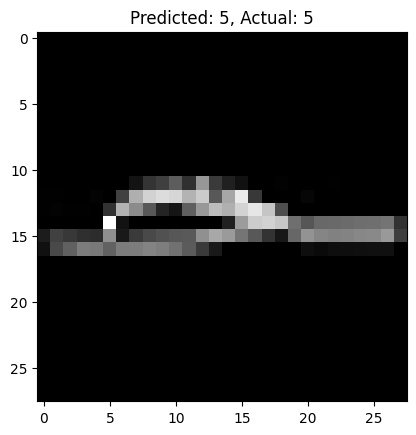

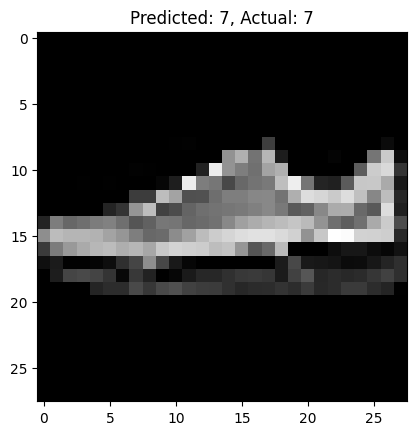

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.81      0.80      1000
           3       0.91      0.85      0.88      1000
           4       0.78      0.82      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.71      0.65      0.68      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Define the model with dropout
model_dropout = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),  # Add dropout layer with a rate of 0.2
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_dropout.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_dropout.fit(x_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model_dropout.evaluate(x_test, y_test)
print('Test accuracy with dropout:', test_acc)

# Get predictions for the test set
y_pred_dropout = model_dropout.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_classes_dropout = np.argmax(y_pred_dropout, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Display some examples of predicted vs actual labels
num_examples = 10
for i in range(num_examples):
  plt.imshow(x_test[i], cmap='gray')
  plt.title(f"Predicted: {y_pred_classes_dropout[i]}, Actual: {y_true_classes[i]}")
  plt.show()


print(classification_report(y_true_classes, y_pred_classes_dropout))

model_dropout.summary()